In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold, GridSearchCV

num_of_blobs = 5
x, y = make_blobs(1000, centers=num_of_blobs, random_state=1)

svc = SVC(gamma='auto')
grid_search_cv = GridSearchCV(
    svc, 
    {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.01, 0.1, 1, 10, 100]
    }, 
    cv=KFold(3))
grid_search_cv.fit(x, y)

print('best', grid_search_cv.best_params_)

best {'C': 1, 'kernel': 'linear'}


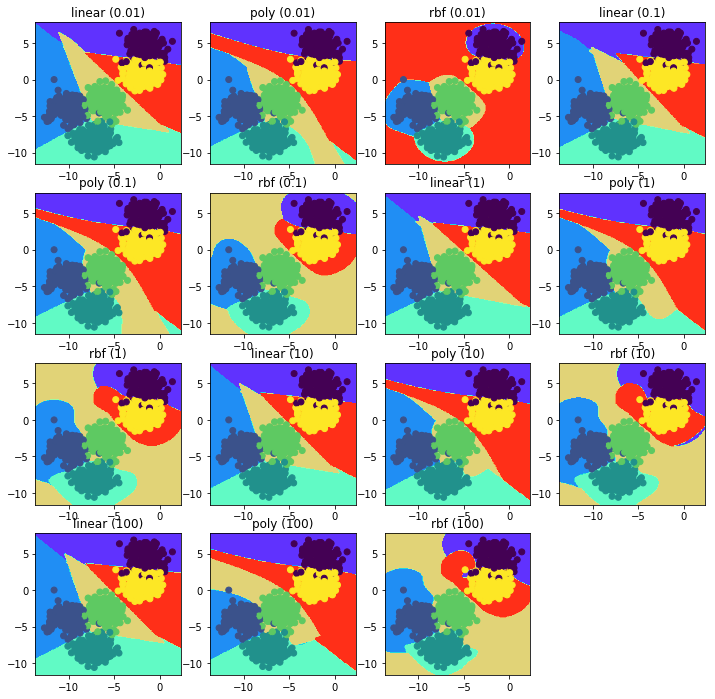

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy

x_min = x[:, 0].min() - 1
x_max = x[:, 0].max() + 1
y_min = x[:, 1].min() - 1
y_max = x[:, 1].max() + 1

grid_step = 0.1
grid_x_positions = numpy.arange(x_min, x_max, grid_step)
grid_y_positions = numpy.arange(y_min, y_max, grid_step)
grid_x, grid_y = numpy.meshgrid(grid_x_positions, grid_y_positions)
grid = numpy.c_[grid_x.ravel(), grid_y.ravel()]

plt.figure(figsize=(12, 12))

i = 0
for param_set in grid_search_cv.cv_results_['params']:
    svc.set_params(**param_set)
    svc = svc.fit(x, y)
    predictions = svc.predict(grid)
    
    predictions = predictions.reshape(grid_x.shape)
    plt.subplot(4, 4, i + 1)
    plt.title(f'{param_set["kernel"]} ({param_set["C"]})')
    plt.contourf(grid_x, grid_y, predictions, cmap=plt.cm.rainbow)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    i = i + 1

plt.show()